# Springboard Apps project - Tier 3 - Complete

**Brief**

Did Apple Store apps receive better reviews than Google Play apps?

## Stages of the project

1. Sourcing and loading 
    * Load the two datasets
    * Pick the columns that we are going to work with 
    * Subsetting the data on this basis 
 
 
2. Cleaning, transforming and visualizing
    * Check the data types and fix them
    * Add a `platform` column to both the `Apple` and the `Google` dataframes
    * Changing the column names to prepare for a join 
    * Join the two data sets
    * Eliminate the `NaN` values
    * Filter only those apps that have been reviewed at least once
    * Summarize the data visually and analytically (by the column `platform`)  
  
  
3. Modelling 
    * Hypothesis formulation
    * Getting the distribution of the data
    * Permutation test 


4. Evaluating and concluding 
    * What is our conclusion?
    * What is our decision?
    * Other models we could have used. 
    

## Importing the libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import random

## Stage 1 -  Sourcing and loading data

### 1a. Source and load the data
The data for this project was downloaded from Kaggle. The data from the Apple Store can be found [here](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps) and the data from Google Store can be found [here](https://www.kaggle.com/lava18/google-play-store-apps).

In [2]:
# create path to file variable
google = 'googleplaystore.csv'

# Read the csv file into a data frame called Google using the read_csv() pandas method.
Google = pd.read_csv(google)

Google.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [5]:
apple = 'AppleStore.csv'
Apple = pd.read_csv(apple, index_col=0)
Apple.head(3)

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1


### 1b. Pick the columns we'll work with

From the documentation of these datasets, we can infer that the most appropriate columns to answer the brief are:

1. Google:
    * `Category` # Do we need this?
    * `Rating`
    * `Reviews`
    * `Price` (maybe)
2. Apple:    
    * `prime_genre` # Do we need this?
    * `user_rating` 
    * `rating_count_tot`
    * `price` (maybe)

### 1c. Subsetting accordingly


In [8]:
# Subset our DataFrame object Google by selecting just the variables ['Category', 'Rating', 'Reviews', 'Price']
Google = Google[['Category', 'Rating', 'Reviews', 'Price']]
Google.head(3)

,Category,Rating,Reviews,Price
0,ART_AND_DESIGN,4.1,159,0
1,ART_AND_DESIGN,3.9,967,0
2,ART_AND_DESIGN,4.7,87510,0


In [13]:
# Do the same with our Apple object, selecting just the variables ['prime_genre', 'user_rating', 'rating_count_tot', 'price']
Apple = Apple[['prime_genre', 'user_rating', 'rating_count_tot', 'price']]
Apple = Apple.reset_index(drop=True)
Apple.head(3)

,prime_genre,user_rating,rating_count_tot,price
0,Games,4.0,21292,3.99
1,Productivity,4.0,161065,0.00
2,Weather,3.5,188583,0.00


## Stage 2 -  Cleaning, transforming and visualizing

### 2a. Check the data types for both Apple and Google, and fix them
 

In [15]:
Apple.dtypes

prime_genre          object
user_rating         float64
rating_count_tot      int64
price               float64
dtype: object

This is looking healthy. But what about our Google data frame?

In [16]:
Google.dtypes

Category     object
Rating      float64
Reviews      object
Price        object
dtype: object

Weird. The data type for the column 'Price' is 'object', not a numeric data type like a float or an integer. Let's investigate the unique values of this column. 

In [17]:
Google.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

Aha! Fascinating. There are actually two issues here. 

- Firstly, there's a price called `Everyone`. That is a massive mistake! 
- Secondly, there are dollar symbols everywhere! 


Let's address the first issue first. Let's check the datapoints that have the price value `Everyone`

In [18]:
Google.loc[Google.Price == 'Everyone']

,Category,Rating,Reviews,Price
10472,1.9,19.0,3.0M,Everyone


Thankfully, it's just one row. We've gotta get rid of it. 

In [19]:
Google = Google.loc[~(Google.Price == 'Everyone')]

# Check again the unique values of Google
Google.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

Our second problem remains: I'm seeing dollar symbols when I close my eyes! (And not in a good way). 

In [23]:
# Let's create a variable called nosymb.
# This variable will take the Price column of Google and apply the str.replace() method. 
nosymb = Google.Price.str.replace('$', '')

# Now we need to do two things:
# i. Make the values in the nosymb variable numeric using the to_numeric() pandas method.
# ii. Assign this new set of numeric, dollar-sign-less values to Google['Price']. 
# You can do this in one line if you wish.
Google.Price = pd.to_numeric(nosymb)

Now let's check the data types for our Google dataframe again, to verify that the 'Price' column really is numeric now.

In [24]:
Google.dtypes

Category     object
Rating      float64
Reviews      object
Price       float64
dtype: object

Notice that the column `Reviews` is still an object column. We actually need this column to be a numeric column, too. 

In [25]:
Google.Reviews = pd.to_numeric(Google.Reviews)

In [26]:
# Let's check the data types of Google again
Google.dtypes

Category     object
Rating      float64
Reviews       int64
Price       float64
dtype: object

### 2b. Add a `platform` column to both the `Apple` and the `Google` dataframes
Let's add a new column to both dataframe objects called `platform`: all of its values in the Google dataframe will be just 'google', and all of its values for the Apple dataframe will be just 'apple'. 

The reason we're making this column is so that we can ultimately join our Apple and Google data together, and actually test out some hypotheses to solve the problem in our brief. 

In [29]:
Apple['platform'] = 'apple'
Google['platform'] = 'google'

### 2c. Changing the column names to prepare for our join of the two datasets 

In [65]:
# Create a variable called old_names to store the column names of the Apple dataframe 
old_names = Apple.columns

# Create a variable called new_names to store the column names of the Google dataframe 
new_names = Google.columns

# change the columns names
Apple.rename(columns=dict(zip(old_names,new_names)), inplace=True)

In [66]:
Apple.head()

,Category,Rating,Reviews,Price,platform
0,Games,4.0,21292,3.99,apple
1,Productivity,4.0,161065,0.00,apple
2,Weather,3.5,188583,0.00,apple
3,Shopping,4.0,262241,0.00,apple
4,Reference,4.5,985920,0.00,apple


### 2d. Join the two datasets 
Let's combine the two datasets into a single data frame called `df`.

In [67]:
# Let's use append() 
df = Google.append(Apple)

# check 12 random points of the joined dataset
df.sample(12)

,Category,Rating,Reviews,Price,platform
1812,GAME,4.4,70747,0.00,google
9095,FINANCE,4.7,642,0.00,google
9448,NEWS_AND_MAGAZINES,NaN,10,0.00,google
1694,GAME,4.5,10216538,0.00,google
1663,Games,4.5,28902,0.00,apple
9911,FAMILY,5.0,5,0.00,google
1369,Games,4.5,78918,0.00,apple
7812,GAME,4.5,299046,0.00,google
5716,Productivity,3.5,353,9.99,apple
8371,FAMILY,4.3,10,12.99,google


In [71]:
df.sort_index()

,Category,Rating,Reviews,Price,platform
0,ART_AND_DESIGN,4.1,159,0.00,google
0,Games,4.0,21292,3.99,apple
1,Productivity,4.0,161065,0.00,apple
1,ART_AND_DESIGN,3.9,967,0.00,google
2,ART_AND_DESIGN,4.7,87510,0.00,google
...,...,...,...,...,...
10836,FAMILY,4.5,38,0.00,google
10837,FAMILY,5.0,4,0.00,google
10838,MEDICAL,NaN,3,0.00,google
10839,BOOKS_AND_REFERENCE,4.5,114,0.00,google


### 2e. Eliminate the NaN values

As you can see there are some `NaN` values. We want to eliminate all these `NaN` values from the table.

In [ ]:
# check shape of df
df.shape

In [75]:
# Use the dropna() method to eliminate all the NaN values, and overwrite the same dataframe with the result. 
df = df.dropna()

# Check the new dimesions of our dataframe. 
df.shape

(16563, 5)

### 2f. Filter the data so that we only see whose apps that have been reviewed at least once

Apps that haven't been reviewed yet can't help us solve our brief. 

So let's check to see if any apps have no reviews at all. 

In [76]:
# Subset df to pick out just those rows whose value for 'Reviews' is equal to 0. 
df.loc[df.Reviews == 0].count()

Category    929
Rating      929
Reviews     929
Price       929
platform    929
dtype: int64

929 apps do not have reviews, we need to eliminate these points!

In [77]:
# Eliminate the points that have 0 reviews.
df = df.loc[~(df.Reviews == 0)]
df.loc[df.Reviews == 0].count()

Category    0
Rating      0
Reviews     0
Price       0
platform    0
dtype: int64

### 2g. Summarize the data visually and analytically (by the column `platform`)

What we need to solve our brief is a summary of the `Rating` column, but separated by the different platforms.

In [79]:
# To summarize analytically, let's use the groupby() method on our df.
df.groupby('platform').mean()

,Rating,Reviews,Price
platform,,,
apple,4.049697,14803.805520,1.821977
google,4.191757,514049.836536,0.960928


Interesting! Our means of 4.049697 and 4.191757 don't **seem** all that different! Perhaps we've solved our brief already: there's no significant difference between Google Play app reviews and Apple Store app reviews. We have an ***observed difference*** here: which is simply (4.191757 - 4.049697) = 0.14206. This is just the actual difference that we observed between the mean rating for apps from Google Play, and the mean rating for apps from the Apple Store. Let's look at how we're going to use this observed difference to solve our problem using a statistical test. 

**Outline of our method:**
1. We'll assume that platform (i.e, whether the app was Google or Apple) really doesn’t impact on ratings. 


2. Given this assumption, we should actually be able to get a difference in mean rating for Apple apps and mean rating for Google apps that's pretty similar to the one we actually got (0.14206) just by: 
a. shuffling the ratings column, 
b. keeping the platform column the same,
c. calculating the difference between the mean rating for Apple and the mean rating for Google. 


3. We can make the shuffle more useful by doing it many times, each time calculating the mean rating for Apple apps and the mean rating for Google apps, and the difference between these means. 


4. We can then take the mean of all these differences, and this will be called our permutation difference. This permutation difference will be great indicator of what the difference would be if our initial assumption were true and platform really doesn’t impact on ratings. 


5. Now we do a comparison. If the observed difference looks just like the permutation difference, then we stick with the claim that actually, platform doesn’t impact on ratings. If instead, however, the permutation difference differs significantly from the observed difference, we'll conclude: something's going on; the platform does in fact impact on ratings. 


6. As for what the definition of *significantly* is, we'll get to that. But there’s a brief summary of what we're going to do. Exciting!

If you want to look more deeply at the statistics behind this project, check out [this resource](https://www.springboard.com/archeio/download/4ea4d453b0b84014bcef287c50f47f00/).

Let's also get a **visual summary** of the `Rating` column, separated by the different platforms. 

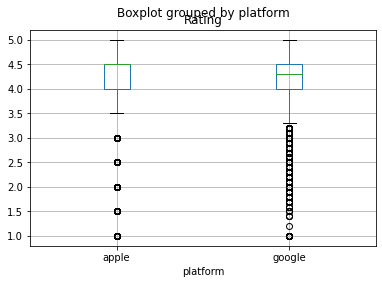

In [84]:
# Call the boxplot() method on our df.
df.boxplot('Rating', by='platform');

## Stage 3 - Modelling

### 3a. Hypothesis formulation

Our **Null hypothesis** is:

**H<sub>null</sub>**: the observed difference in the mean rating of Apple Store and Google Play apps is due to chance (and thus not due to the platform).

The **Alternate hypothesis** os:

**H<sub>alternative</sub>**: the observed difference in the average ratings of apple and google users is not due to chance (and is actually due to platform)

We're selecting a **significance level** of 0.05. 

### 3b. Getting the distribution of the data
Now that the hypotheses and significance level are defined, we can select a statistical test to determine which hypothesis to accept. One of the most important things to determine is the **distribution of the data**.   

In [87]:
# Create subsets of the column 'Rating' by the different platforms
apple = df['Rating'].loc[df.platform == 'apple']
google = df['Rating'].loc[df.platform == 'google']

In [89]:
# get an indication of whether the apple data are normally distributed
apple_normal = stats.normaltest(apple)
apple_normal

NormaltestResult(statistic=1778.9974234584017, pvalue=0.0)

In [90]:
# Do the same with the google data. 
google_normal = stats.normaltest(google)
google_normal

NormaltestResult(statistic=3678.6157187516856, pvalue=0.0)

Since the null hypothesis of the normaltest() is that the data are normally distributed, the lower the p-value in the result of this test, the more likely the data are to be non-normal. 

Since the p-values is 0 for both tests, regardless of what we pick for the significance level, our conclusion is that the data are not normally distributed. 

We can actually also check out the distribution of the data visually with a histogram to verify this.

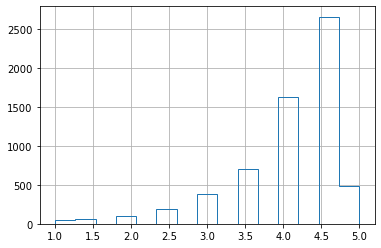

In [91]:
# Create a histogram of the apple reviews distribution
apple.hist(histtype='step', bins=15);

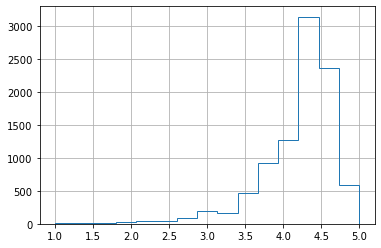

In [92]:
# Create a histogram of the google data
google.hist(histtype='step', bins=15);

### 3c. Permutation test
Since the data aren't normally distributed, we're using a *non-parametric* test here.

In [107]:
# Create a column called `Permutation1`, and assign to it the result of permuting the Rating column
df['Permutation1'] = np.random.permutation(df.Rating)

# Call the describe() method on our permutation grouped by 'platform'
df.Permutation1.groupby(df.platform).describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
apple,6268.0,4.132179,0.605791,1.0,4.0,4.3,4.5,5.0
google,9366.0,4.136558,0.617726,1.0,4.0,4.3,4.5,5.0


In [110]:
# extract permutation mean of apple ratings and of google ratings
perm1_apple = df.Permutation1.groupby(df.platform).mean().apple
perm1_google = df.Permutation1.groupby(df.platform).mean().google

In [126]:
# Lets compare with the previous analytical summary:
obs_diff = abs(df['Rating'].groupby(df.platform).mean().google - df['Rating'].groupby(df.platform).mean().apple)
perm1_diff = abs(perm1_google - perm1_apple)
compare = abs(perm1_diff - obs_diff)
print(str(compare) + 'point difference between observed mean and permutation mean'
print(str(compare * 100) + '% difference between observed mean and permutation mean')

13.768210888110044% difference between observed mean and permutation mean


In [119]:
# The difference in the means for Permutation1 (0.001103) now looks hugely different to our observed difference of 0.14206. 
# It's sure starting to look like our observed difference is significant, and that the Null is false; platform does impact on ratings
# But to be sure, let's create 10,000 permutations, calculate the mean ratings for Google and Apple apps and the difference between these for each one, and then take the average of all of these differences.
# Let's create a vector with the differences - that will be the distibution of the Null.

difference = []

# Now we'll make a for loop that does the following 10,000 times:
# 1. makes a permutation of the 'Rating' as you did above
# 2. calculates the difference in the mean rating for apple and the mean rating for google. 
for i in range(10000):
    df['permutation'] = np.random.permutation(df.Rating)
    apple_mean = df.permutation.groupby(df.platform).mean().apple
    google_mean = df.permutation.groupby(df.platform).mean().google
    diff = abs(google_mean - apple_mean)
    difference.append(diff)
    

In [120]:
difference

[0.009464953617759342,
 0.01122730916765935,
 0.006273948964207854,
 0.0042985456636222,
 0.006007639275861898,
 0.004569566958725346,
 0.0038191882245506292,
 0.0059277463693447885,
 0.004835876647073967,
 0.0019283894372250643,
 0.005177367635194052,
 0.000628183571008023,
 0.0008412313217105449,
 0.005661436680989063,
 0.002598875264888889,
 0.00578987991841462,
 0.007259294811130523,
 0.010636716246525957,
 0.0015289249047034659,
 0.013885694444489616,
 0.008399714864320451,
 0.004245283725949456,
 0.01758739911267604,
 0.003983685644337598,
 0.004724641164984611,
 0.005954377338194483,
 0.014289870583787057,
 0.0017952345930689617,
 0.007121428360213677,
 0.022465578016380938,
 0.00320667594133095,
 0.014769228022825764,
 0.0019863629816292416,
 0.005608174743295002,
 0.011893083388551773,
 0.0016354487800320783,
 0.008692655521514325,
 0.01180847887530767,
 0.007201321266720129,
 0.007871807094361749,
 0.0013957700605322643,
 0.010636716246530398,
 0.004942400522414125,
 0.008532

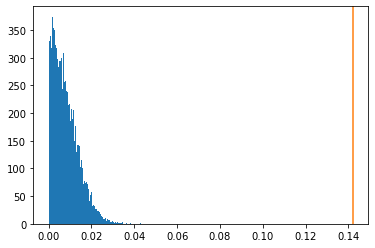

In [127]:
# Make a variable called 'histo', and assign to it the result of plotting a histogram of the difference list. 
histo = plt.hist(difference, bins=100)

# add a vertical line for our observed difference
histo = plt.axvline(obs_difference, color='C1')

In [125]:
# Now make a variable called obs_difference, and assign it the result of the mean of our 'apple' variable and the mean of our 'google variable'
obs_difference = abs(df['Rating'].groupby(df.platform).mean().google - df['Rating'].groupby(df.platform).mean().apple)

obs_difference

0.14206054745123442

## Stage 4 -  Evaluating and concluding
### 4a. What is our conclusion?

In [132]:
'''
What do we know? 

Recall: The p-value of our observed data is just the proportion of the data given the null that's at least as extreme as that observed data.

As a result, we're going to count how many of the differences in our difference list are at least as extreme as our observed difference.

If less than or equal to 5% of them are, then we will reject the Null. 
'''

np.sum(difference > obs_difference)

# normally we would compute confidence interval here, but since 0 of our permuted differences 
# are as extreme as our observed difference, there is no need.

0

### 4b. What is our decision?
So actually, zero differences are at least as extreme as our observed difference!

So the p-value of our observed data is 0. 

It doesn't matter which significance level we pick; our observed data is statistically significant, and we reject the Null.

We conclude that platform does impact on ratings. Specifically, we should advise our client to integrate **only Google Play** into their operating system interface. 